# Análisis de Datos Book-Crossing


In [ ]:
!unzip book-crossing.zip -d /content

Archive:  book-crossing.zip
  inflating: /content/Books.csv      
  inflating: /content/Ratings.csv    
  inflating: /content/Users.csv      


## Cargar los datos

In [ ]:
import pandas as pd
import numpy as np

books = pd.read_csv('Books.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
ratings = pd.read_csv('Ratings.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
users = pd.read_csv('Users.csv', sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)

books.columns = ['isbn', 'title', 'author', 'year', 'publisher']
ratings.columns = ['user_id', 'isbn', 'rating']

ratings['rating'] = pd.to_numeric(ratings['rating'], errors='coerce')

author_dict = {}
for index, row in books.iterrows():
    isbn = row['isbn']
    author = row['author'] if pd.notna(row['author']) else 'Unknown'
    author_dict[isbn] = author

In [ ]:
# Mostrar información básica de los datasets
print("Columns in books dataframe:")
print(books.columns.tolist())

display(books.head())
display(ratings.head())
display(users.head())

Columns in books dataframe:
['isbn', 'title', 'author', 'year', 'publisher']


,isbn,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


,User-ID,Age
0,1,NaN
1,2,18
2,3,NaN
3,4,17
4,5,NaN


## Analizar los datos


In [ ]:
print("Ratings DataFrame Info:")
print(ratings.shape)
ratings.info()
print("\nRatings DataFrame Descriptive Statistics:")
display(ratings.describe())
print("\nRatings DataFrame Missing Values:")
print(ratings.isnull().sum())

print("\nBooks DataFrame Info:")
print(books.shape)
books.info()
print("\nBooks DataFrame Descriptive Statistics:")
display(books.describe())
print("\nBooks DataFrame Missing Values:")
print(books.isnull().sum())

print("\nUsers DataFrame Info:")
print(users.shape)
users.info()
print("\nUsers DataFrame Descriptive Statistics:")
display(users.describe())
print("\nUsers DataFrame Missing Values:")
print(users.isnull().sum())

Ratings DataFrame Info:
(1149780, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   isbn     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

Ratings DataFrame Descriptive Statistics:


,user_id,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01



Ratings DataFrame Missing Values:
user_id    0
isbn       0
rating     0
dtype: int64

Books DataFrame Info:
(271379, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   isbn       271379 non-null  object
 1   title      271379 non-null  object
 2   author     271377 non-null  object
 3   year       271379 non-null  int64 
 4   publisher  271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB

Books DataFrame Descriptive Statistics:


,year
count,271379.000000
mean,1959.756050
std,258.011363
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000



Books DataFrame Missing Values:
isbn         0
title        0
author       2
year         0
publisher    2
dtype: int64

Users DataFrame Info:
(278859, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278859 non-null  object
 1   Age      168627 non-null  object
dtypes: object(2)
memory usage: 4.3+ MB

Users DataFrame Descriptive Statistics:


,User-ID,Age
count,278859,168627
unique,278859,311
top,278858,24
freq,1,5651



Users DataFrame Missing Values:
User-ID         0
Age        110232
dtype: int64


## Métricas Book-Crossing

In [ ]:
# Filter ratings to only include those above 0
ratings_filtered = ratings[ratings['rating'] > 0].copy()

num_users = ratings_filtered['user_id'].nunique()
num_books = ratings_filtered['isbn'].nunique()
num_ratings = ratings_filtered.shape[0]
average_rating = ratings_filtered['rating'].mean()

# Análisis de autores
num_authors = books['author'].nunique()
books_per_author = books.groupby('author').size()
top_authors = books_per_author.sort_values(ascending=False).head(10)

user_ratings_count = ratings_filtered['user_id'].value_counts()
cold_start_users = user_ratings_count[user_ratings_count < 5].shape[0]

book_ratings_count = ratings_filtered['isbn'].value_counts()
cold_start_books = book_ratings_count[book_ratings_count < 5].shape[0]

std_rating = ratings_filtered['rating'].std()

highest_rating = ratings_filtered['rating'].max()
lowest_rating = ratings_filtered['rating'].min()

max_book_ratings = book_ratings_count.max()
min_book_ratings = book_ratings_count.min()

average_book_rating = ratings_filtered.groupby('isbn')['rating'].mean().mean()

average_user_rating = ratings_filtered.groupby('user_id')['rating'].mean().mean()


average_reviews_per_user = ratings_filtered.shape[0] / ratings_filtered['user_id'].nunique()

average_reviews_per_book = ratings_filtered.shape[0] / ratings_filtered['isbn'].nunique()

min_user_ratings = user_ratings_count.min()
max_user_ratings = user_ratings_count.max()

# Análisis de diversidad por autor
ratings_with_authors = ratings_filtered.merge(books[['isbn', 'author']], on='isbn', how='left')
author_diversity = ratings_with_authors.groupby('user_id')['author'].nunique().mean()

print(f"Number of unique users (with ratings > 0): {num_users}")
print(f"Number of unique books (with ratings > 0): {num_books}")
print(f"Number of unique authors (from all books): {num_authors}")
print(f"Total number of ratings (> 0): {num_ratings}")
print(f"Average rating (> 0): {average_rating:.2f}")
print(f"Number of cold start users (<5 reviews >0): {cold_start_users}")
print(f"Number of cold start books (<5 reviews >0): {cold_start_books}")
print(f"Standard deviation of ratings (> 0): {std_rating:.2f}")
print(f"Highest rating (> 0): {highest_rating}")
print(f"Lowest rating (> 0): {lowest_rating}")
print(f"Maximum ratings per book (> 0): {max_book_ratings}")
print(f"Minimum ratings per book (> 0): {min_book_ratings}")
print(f"Average rating per book (> 0): {average_book_rating:.2f}")
print(f"Average rating given by users (> 0): {average_user_rating:.2f}")
print(f"Average number of reviews per user (> 0): {average_reviews_per_user:.2f}")
print(f"Average number of reviews per book (> 0): {average_reviews_per_book:.2f}")
print(f"Maximum ratings per user (> 0): {max_user_ratings}")
print(f"Minimum ratings per user (> 0): {min_user_ratings}")
print(f"Average author diversity per user (with ratings > 0): {author_diversity:.2f}")
print(f"\nTop 10 authors by number of books:")
for author, count in top_authors.items():
    print(f"  {author}: {count} books")

Number of unique users (with ratings > 0): 77805
Number of unique books (with ratings > 0): 185973
Number of unique authors (from all books): 102029
Total number of ratings (> 0): 433671
Average rating (> 0): 7.60
Number of cold start users (<5 reviews >0): 63585
Number of cold start books (<5 reviews >0): 171438
Standard deviation of ratings (> 0): 1.84
Highest rating (> 0): 10
Lowest rating (> 0): 1
Maximum ratings per book (> 0): 707
Minimum ratings per book (> 0): 1
Average rating per book (> 0): 7.49
Average rating given by users (> 0): 7.46
Average number of reviews per user (> 0): 5.57
Average number of reviews per book (> 0): 2.33
Maximum ratings per user (> 0): 8524
Minimum ratings per user (> 0): 1
Average author diversity per user (with ratings > 0): 4.14

Top 10 authors by number of books:
  Agatha Christie: 632 books
  William Shakespeare: 567 books
  Stephen King: 524 books
  Ann M. Martin: 423 books
  Carolyn Keene: 373 books
  Francine Pascal: 373 books
  Isaac Asimov: 

# Gráficos Book-Crossing

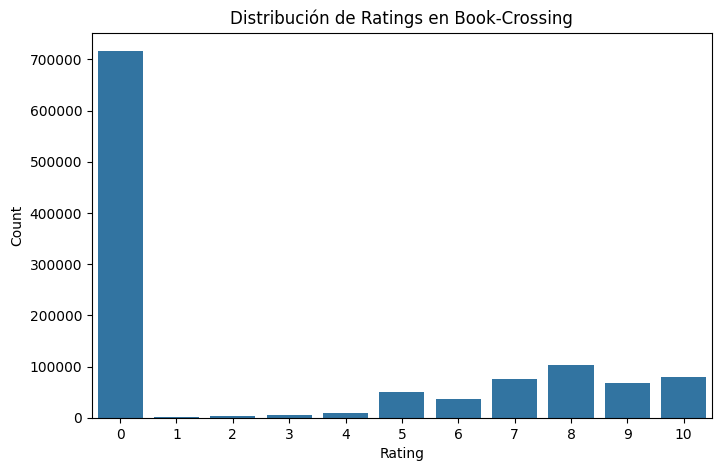

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Distribución de Ratings en Book-Crossing')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Sparsity: 0.999960 (0.0040% de densidad)


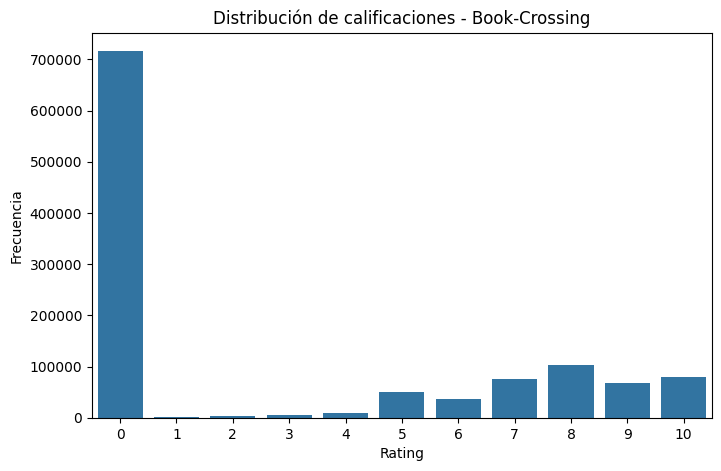

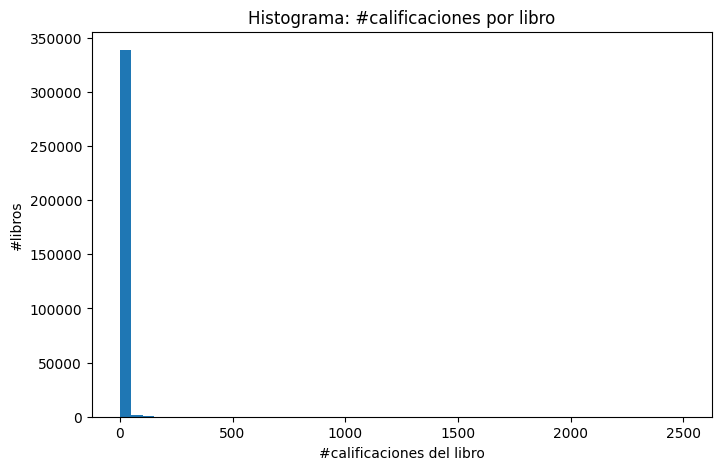

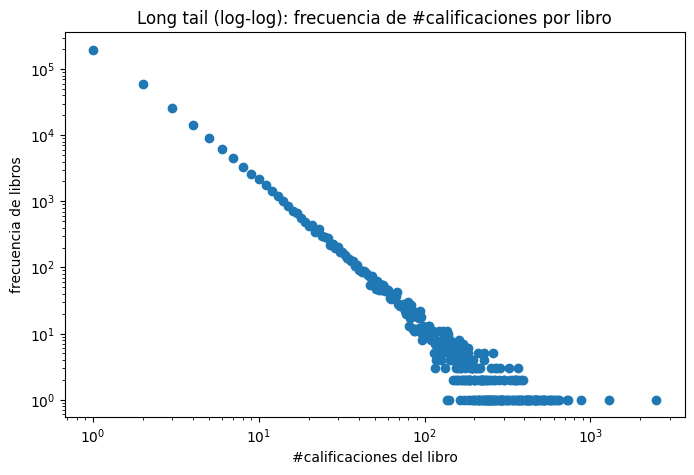

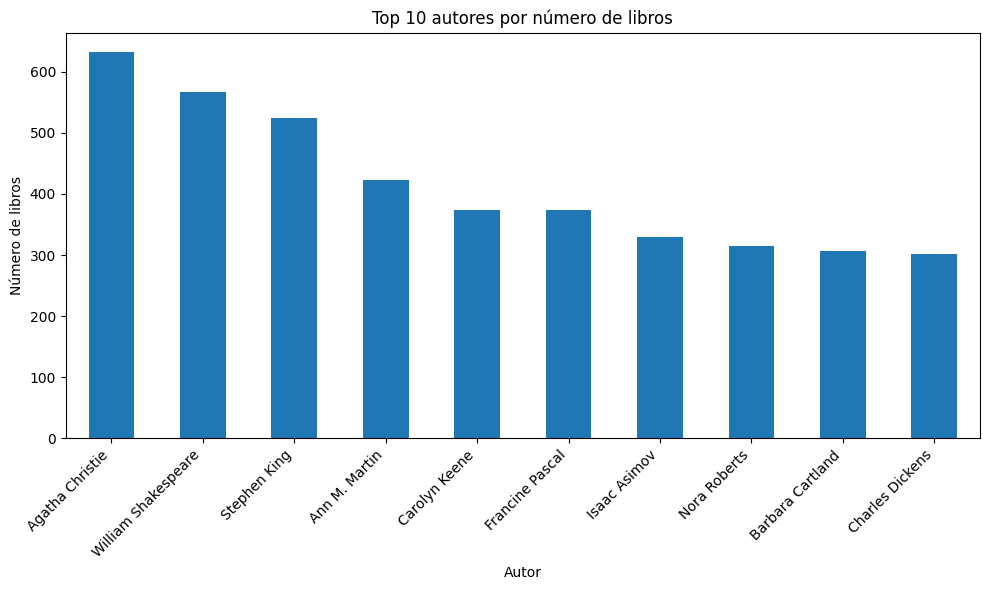

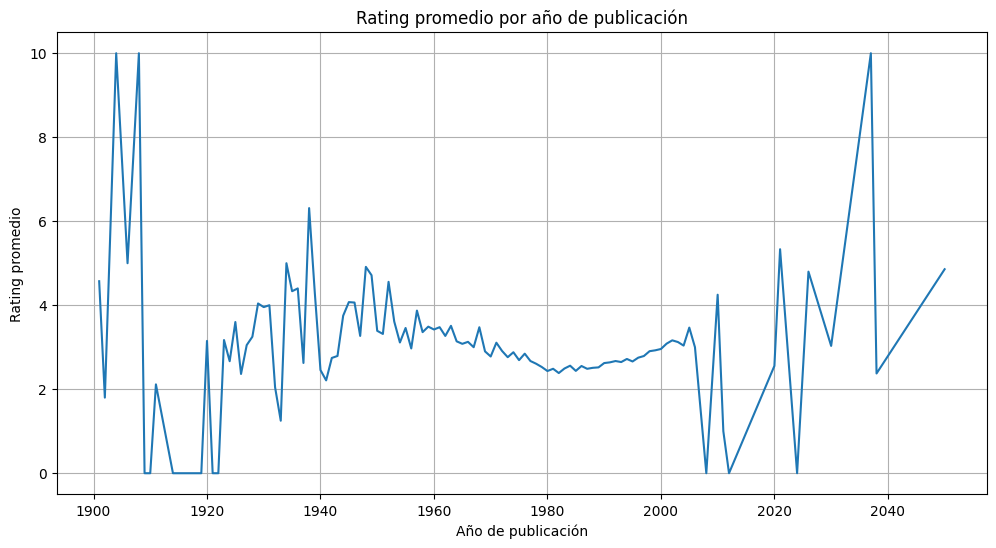

In [ ]:
# Sparsity
num_users = ratings['user_id'].nunique()
num_books = books['isbn'].nunique()
num_ratings = ratings.shape[0]
sparsity = 1 - (num_ratings / (num_users * num_books))
print(f"Sparsity: {sparsity:.6f} ({(1-sparsity)*100:.4f}% de densidad)")

# Distribución de ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings)
plt.title('Distribución de calificaciones - Book-Crossing')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

# Long tail de número de calificaciones por libro
book_ratings_count = ratings['isbn'].value_counts()
plt.figure(figsize=(8,5))
plt.hist(book_ratings_count, bins=50)
plt.title('Histograma: #calificaciones por libro')
plt.xlabel('#calificaciones del libro')
plt.ylabel('#libros')
plt.show()

# Long tail (log-log)
counts = book_ratings_count.value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.loglog(counts.index, counts.values, marker='o', linestyle='none')
plt.title('Long tail (log-log): frecuencia de #calificaciones por libro')
plt.xlabel('#calificaciones del libro')
plt.ylabel('frecuencia de libros')
plt.show()

# Top autores (diversidad)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 autores por número de libros')
plt.xlabel('Autor')
plt.ylabel('Número de libros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribución de ratings por año de publicación
ratings_with_year = ratings.merge(books[['isbn', 'year']], on='isbn', how='left')
# Limpiar años inválidos
ratings_with_year = ratings_with_year[ratings_with_year['year'] != '0']
ratings_with_year = ratings_with_year[ratings_with_year['year'].notna()]
ratings_with_year['year'] = pd.to_numeric(ratings_with_year['year'], errors='coerce')
ratings_with_year = ratings_with_year[ratings_with_year['year'] > 1900]

plt.figure(figsize=(12, 6))
yearly_avg_rating = ratings_with_year.groupby('year')['rating'].mean()
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values)
plt.title('Rating promedio por año de publicación')
plt.xlabel('Año de publicación')
plt.ylabel('Rating promedio')
plt.grid(True)
plt.show()

## Análisis de Diversidad por Autor

In [ ]:
# Análisis detallado de diversidad de autores
print("=== ANÁLISIS DE DIVERSIDAD POR AUTOR ===\n")

# 1. Distribución de libros por autor
books_per_author = books['author'].value_counts()
print(f"Autores con solo 1 libro: {(books_per_author == 1).sum()}")
print(f"Autores con 2-5 libros: {((books_per_author >= 2) & (books_per_author <= 5)).sum()}")
print(f"Autores con 6+ libros: {(books_per_author >= 6).sum()}")

# 2. Autores más populares por número de ratings
author_popularity = ratings_with_authors.groupby('author').size().sort_values(ascending=False)
print(f"\nTop 10 autores más populares (por número de ratings):")
for i, (author, count) in enumerate(author_popularity.head(10).items(), 1):
    print(f"{i}. {author}: {count} ratings")

# 3. Autores mejor calificados (mínimo 50 ratings)
author_avg_rating = ratings_with_authors.groupby('author')['rating'].agg(['mean', 'count'])
top_rated_authors = author_avg_rating[author_avg_rating['count'] >= 50].sort_values('mean', ascending=False)
print(f"\nTop 10 autores mejor calificados (mínimo 50 ratings):")
for i, (author, data) in enumerate(top_rated_authors.head(10).iterrows(), 1):
    print(f"{i}. {author}: {data['mean']:.2f} ({data['count']} ratings)")

# 4. Distribución de diversidad de autores por usuario
user_author_diversity = ratings_with_authors.groupby('user_id')['author'].nunique()
print(f"\nEstadísticas de diversidad de autores por usuario:")
print(f"  - Media: {user_author_diversity.mean():.2f} autores diferentes")
print(f"  - Mediana: {user_author_diversity.median():.2f} autores diferentes")
print(f"  - Máximo: {user_author_diversity.max()} autores diferentes")
print(f"  - Mínimo: {user_author_diversity.min()} autores diferentes")


=== ANÁLISIS DE DIVERSIDAD POR AUTOR ===

Autores con solo 1 libro: 68394
Autores con 2-5 libros: 25612
Autores con 6+ libros: 8023

Top 10 autores más populares (por número de ratings):
1. Stephen King: 10053 ratings
2. Nora Roberts: 8429 ratings
3. John Grisham: 6010 ratings
4. James Patterson: 5845 ratings
5. Mary Higgins Clark: 4777 ratings
6. Dean R. Koontz: 4313 ratings
7. Tom Clancy: 4036 ratings
8. Danielle Steel: 3726 ratings
9. Sue Grafton: 3457 ratings
10. Janet Evanovich: 3350 ratings

Top 10 autores mejor calificados (mínimo 50 ratings):
1. Paul Vincent: 7.95 (55.0 ratings)
2. Clamp: 6.51 (150.0 ratings)
3. Rumiko Takahashi: 6.45 (83.0 ratings)
4. Joanne K. Rowling: 6.28 (61.0 ratings)
5. Bill Amend: 6.26 (53.0 ratings)
6. Harlan Ellison: 6.13 (97.0 ratings)
7. Shel Silverstein: 6.11 (189.0 ratings)
8. G. B. Trudeau: 5.93 (59.0 ratings)
9. Robert N. Munsch: 5.88 (51.0 ratings)
10. Federico Garcia Lorca: 5.88 (56.0 ratings)

Estadísticas de diversidad de autores por usuario

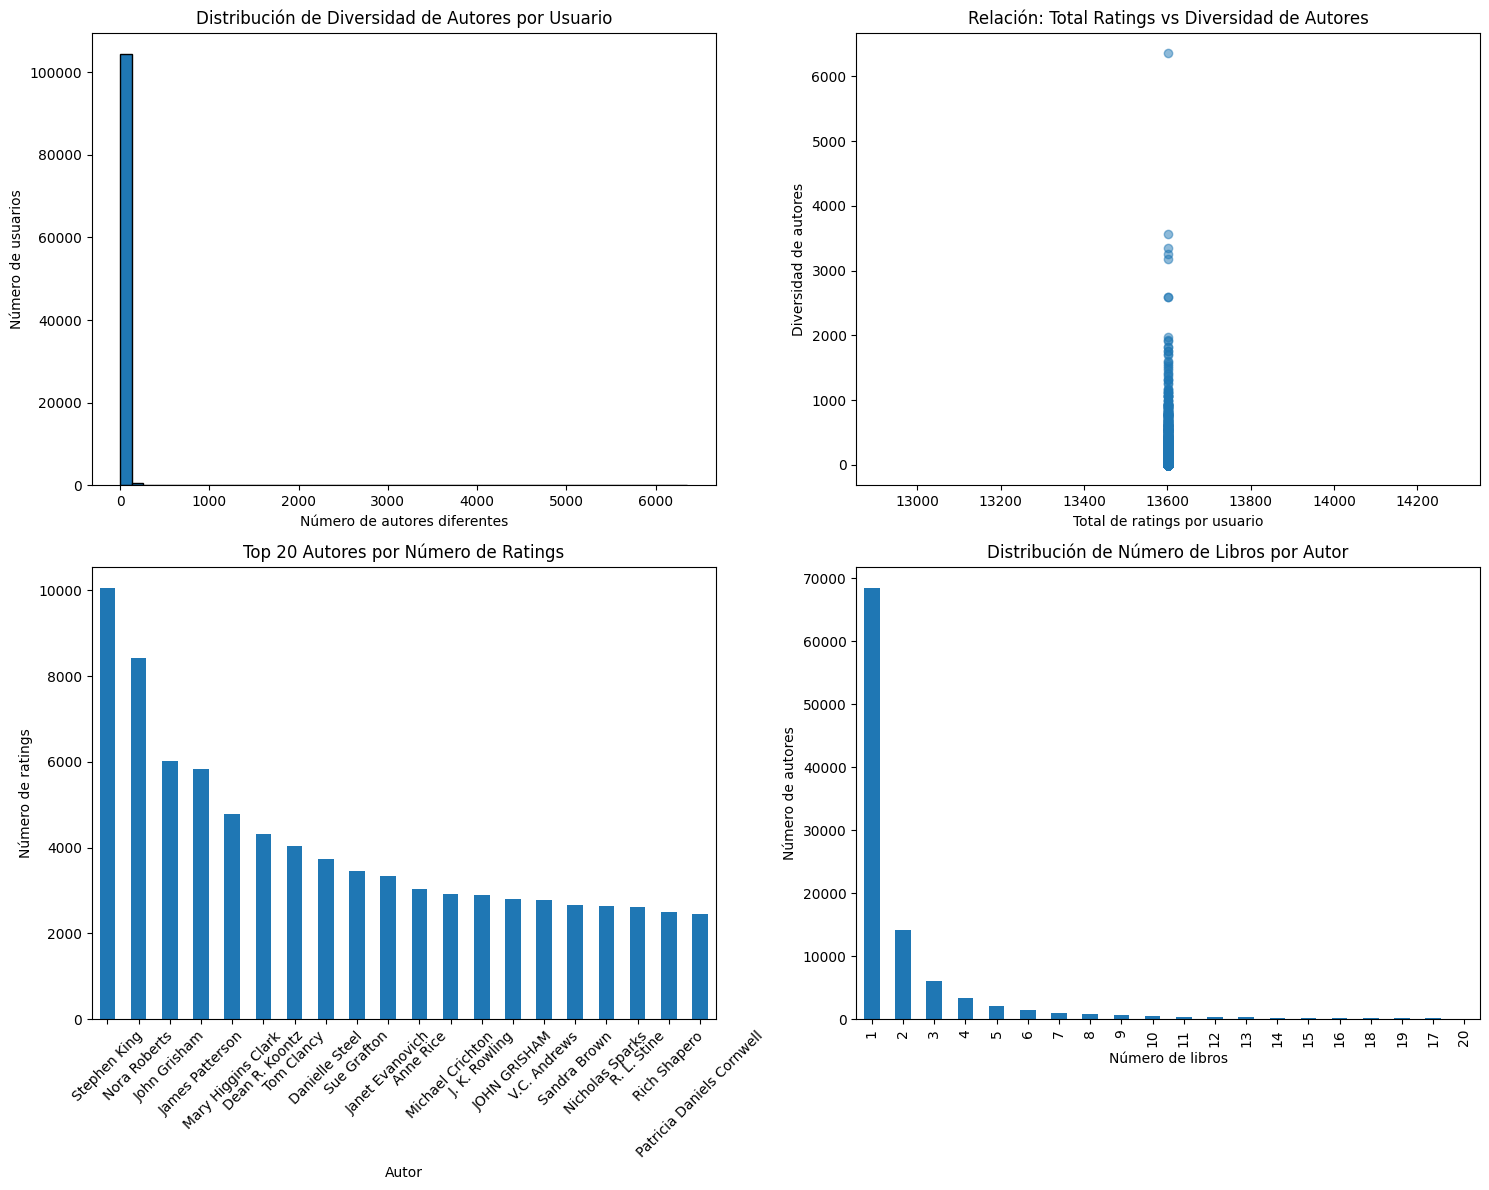

In [ ]:
# Gráficos adicionales para análisis de diversidad
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución de diversidad de autores por usuario
axes[0, 0].hist(user_author_diversity, bins=50, edgecolor='black')
axes[0, 0].set_title('Distribución de Diversidad de Autores por Usuario')
axes[0, 0].set_xlabel('Número de autores diferentes')
axes[0, 0].set_ylabel('Número de usuarios')

# 2. Relación entre número de ratings y diversidad de autores
user_stats = pd.DataFrame({
    'total_ratings': user_ratings_count,
    'author_diversity': user_author_diversity
}).dropna()

axes[0, 1].scatter(user_stats['total_ratings'], user_stats['author_diversity'], alpha=0.5)
axes[0, 1].set_title('Relación: Total Ratings vs Diversidad de Autores')
axes[0, 1].set_xlabel('Total de ratings por usuario')
axes[0, 1].set_ylabel('Diversidad de autores')

# 3. Distribución de ratings por autor (top 20)
author_popularity.head(20).plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Top 20 Autores por Número de Ratings')
axes[1, 0].set_xlabel('Autor')
axes[1, 0].set_ylabel('Número de ratings')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Distribución de libros por autor
author_book_counts = books['author'].value_counts()
author_book_counts.value_counts().head(20).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Número de Libros por Autor')
axes[1, 1].set_xlabel('Número de libros')
axes[1, 1].set_ylabel('Número de autores')

plt.tight_layout()
plt.show()